## UTS AI - Krawu - Naive Bayes
 - Nama: Ramadhan Kalih Sewu
 - NPM: 1806148826

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

BarFigSize = (8,5)
DistFigSize = (14,10)
CMFigSize = (12,7)
plt.style.use('grayscale')
cnames = ['1', '2', '3']

### Fungsi yang Digunakan
Ini dilakukan untuk menghilangkan duplikasi kode sehingga mudah dibaca
- TrainTest: Melakukan training data menggunakan Gaussian Naive Bayes dengan parameter untuk tuning
- GetMeanAcc: Mendapatkan akurasi rata-rata pada data testing (menghitung dari banyaknya kecocokan)
- GetTypeAcc: Mendapatkan akurasi tiap kelas pada data testing
- PlotAcc: Plot akurasi untuk tiap kelas sebanyak iterasi (atau hyperparam tuning) yang dilakukan
- PlotTrainTestAcc: Plot bar perbandingan akurasi testing dan akurasi training
- PlotConfusionMatrix: Mengecek tebakan model dengan output yang diharapkan (ekspektasi)

In [3]:
def TrainTest(xTrain, yTrain, xTest, smoothing=1e-9, wParam=None):
    gnb = GaussianNB(var_smoothing=smoothing)
    gnb.fit(xTrain, yTrain, wParam)
    yPred = gnb.predict(xTest)
    return gnb, yPred

def GetMeanAcc(yPred, yTest):
    acc = np.sum(yPred == yTest) / len(yTest)*100.0
    return acc

def GetTypeAcc(yPred, yTest):
    height = []
    for i in range(1, 4):
        pred = yPred == i
        real = yTest == i
        height.append(GetMeanAcc(pred, real))
    return height
    

def PlotAcc(listTypeAcc, xLabel):
    listTypeAcc = np.array(listTypeAcc)
    listTypeAcc = listTypeAcc.transpose()
    size = len(listTypeAcc)
    fig = plt.figure(figsize=BarFigSize)
    ax = fig.add_axes([0,0,1,1])
    ind = np.arange(len(listTypeAcc[0]))
    
    ax.grid(zorder=0)
    for i in range(size):
        ax.bar(ind + 0.25*i, listTypeAcc[i], width=0.25, zorder=3)
        
    ax.legend(labels=cnames)
    plt.xticks(ind, xLabel)
    plt.xlabel('Laplace Smoothing')
    plt.ylabel('Percentage')
    ax.set_title('Test Accuracy Each Class')

def PlotTrainTestAcc(listTrainAcc, listTestAcc, xLabel):
    ind = np.arange(len(listTrainAcc))
    width = 0.35
    fig = plt.figure(figsize=BarFigSize)
    ax = fig.add_axes([0,0,1,1])
    diffTest = [listTestAcc[i]-listTrainAcc[i] for i in range(len(listTestAcc))]
    ax.grid(zorder=0)
    ax.bar(ind, listTrainAcc, width, zorder=3)
    ax.bar(ind, diffTest, width, bottom=listTrainAcc, zorder=3)
    
    ax.legend(labels=['Test', 'Train'])
    plt.ylim(0, max(listTrainAcc) + 10)
    plt.xticks(ind, xLabel)
    plt.xlabel('Laplace Smoothing')
    plt.ylabel('Percentage')
    ax.set_title('Average Test and Train Accuracy Comparison')
    
from sklearn.metrics import plot_confusion_matrix
def PlotConfusionMatrix(title, classifier, ax, xTest, yTest):
    disp = plot_confusion_matrix(classifier, xTest, yTest,
                                 display_labels=cnames,
                                 ax=ax,
                                 cmap='binary',
                                 normalize=None)
    disp.ax_.set_title(title)

### Impor Dataset
Membaca dataset dengan format csv menggunakan fungsi dari Library Pandas.

In [4]:
import pandas as pd
datacsv = pd.read_csv('seeds.csv')
print(datacsv.head())

    Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry.Coeff  Kernel.Groove  Type  
0            2.221          5.220     1  
1            1.018          4.956     1  
2            2.699          4.825     1  
3            2.259          4.805     1  
4            1.355          5.175     1  


### Melihat Elemen Tiap Kelas

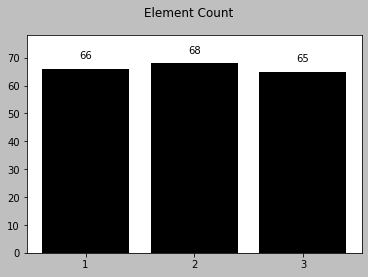

In [5]:
objCount = datacsv['Type'].value_counts(sort=False)

ax = plt.bar(cnames, objCount)
rects = ax.patches
for rect, count in zip(rects, objCount):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height+3, '%d' % count, ha='center', va='bottom')
    
plt.ylim(0, max(objCount) + 10)
plt.suptitle('Element Count')
plt.show()

In [6]:
x = datacsv[['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove']]
y = datacsv.Type
col = x.columns

### Visualisasi Distribusi dari Data
Fungsi ini 'TIDAKLAH' menampilkan distribusi Gaussian yang seharusnya dilakukan oleh fungsi Naive Bayes yang saya gunakan. Melainkan hanyalah ilustrasi untuk menggambarkan sebuah distribusi probabilitas kepadatan data pada setiap variabel atau fitur. Gaussian Naive Bayes akan mencoba membangun hal yang serupa agar dapat mencari probabilitas pada variabel yang kontinu. Probabilitas tiap variabel atau fitur akan diambil kemudian dikomputasi lagi menggunakan teorema bayes.

In [7]:
import seaborn as sns 
def PlotLikelihood(x, y, cat):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=DistFigSize)
    for colname, ax in zip(x, axes.flatten()):
        if (colname == None): break
        feature = x[colname]
        sns.kdeplot(ax=ax, data=x, x=colname)
        ax.set_title('Likelihood KDE Plots for Feature: %s' % colname)
        ax.set_xlabel(colname)
    fig.suptitle('Likelihood Distribution for Type: %d' % cat)
    fig.tight_layout()

#### Distribusi pada Kelas Tipe 1

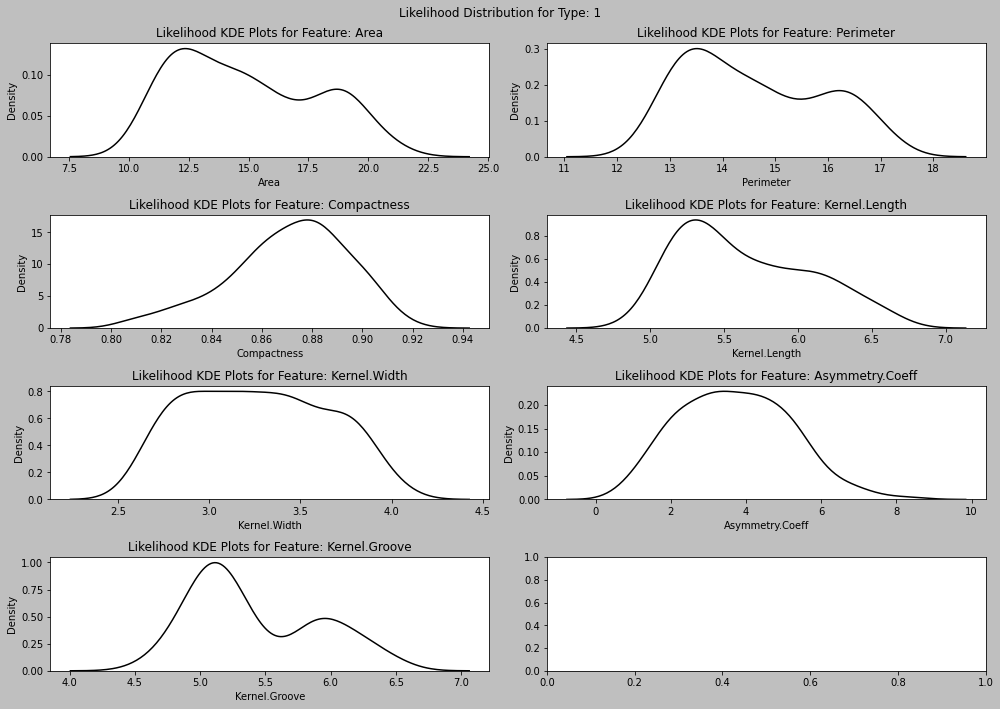

In [8]:
PlotLikelihood(x, y, 1)

#### Distribusi pada Kelas Tipe 1

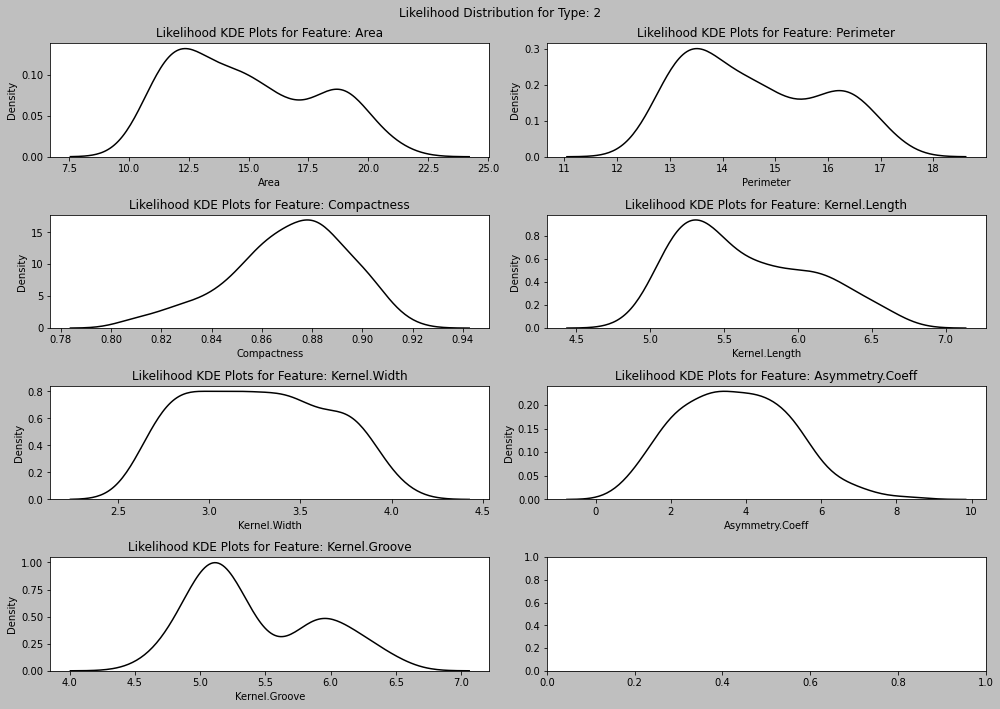

In [9]:
PlotLikelihood(x, y, 2)

#### Distribusi pada Kelas Tipe 3

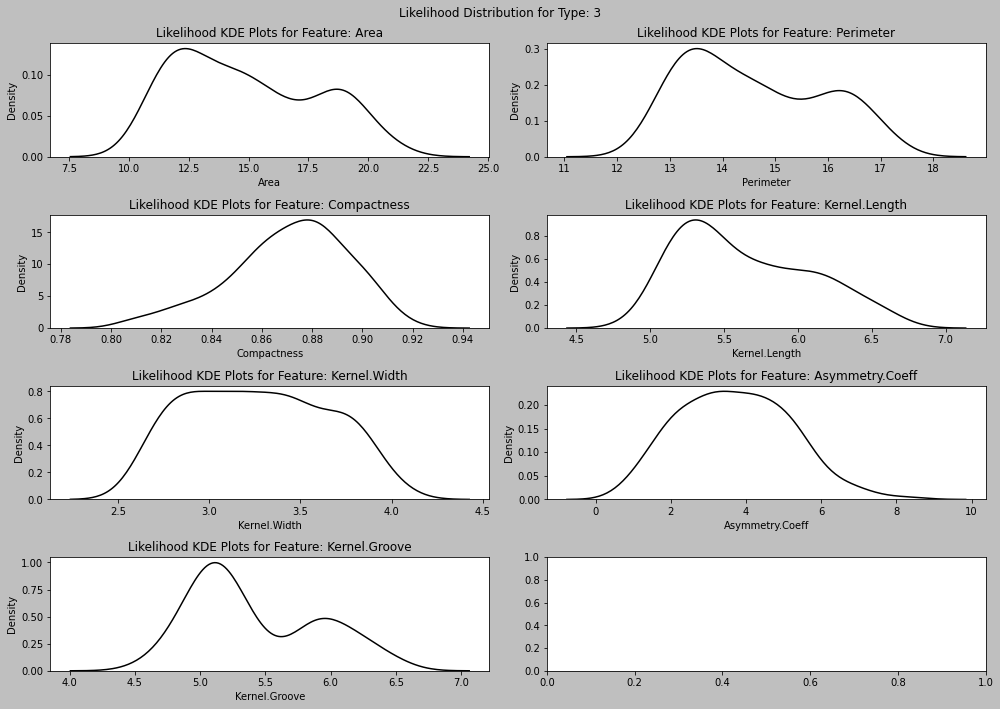

In [10]:
PlotLikelihood(x, y, 3)

Saya menggunakan fungsi dari library SKLearn untuk membagi data training dan testing dengan rasio 50-50. Fungsi ini membantu mengacak data sehingga pada proses training, model bisa lebih objektif.

In [11]:
x = x.to_numpy()
y = y.to_numpy()
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.5)

### HyperParameter Tuning
Laplace smoothing dalam algoritma klasifikasi Naive Bayes ditujukan untuk menghindari probabilitas sebuah fitur bernilai 0. Dalam kata lain, ini merupakan teknik untuk merapikan data kategorikan dengan koreksi sampel kecil dengan penambahan nilai pada setiap perkiraan probabilitas.

In [12]:
smoothing = [ 0, 1e-19, 10, 100 ]
bestAcc = 0
bestGNB = None

### Training
Menggunakan fungsi Gaussian Naive Bayes dari library SKLearn untuk memprediksi klasifikasi sebuah data.
- Matrix Confussion digunakan untuk menampilkan tebakan klasifier terhadap output aslinya.
- Plot bar akurasi test dan train untuk melihat apakah terjadi overfitting model
- Akurasi test dari tiap kelas (klasifikasi) untuk gambaran detil

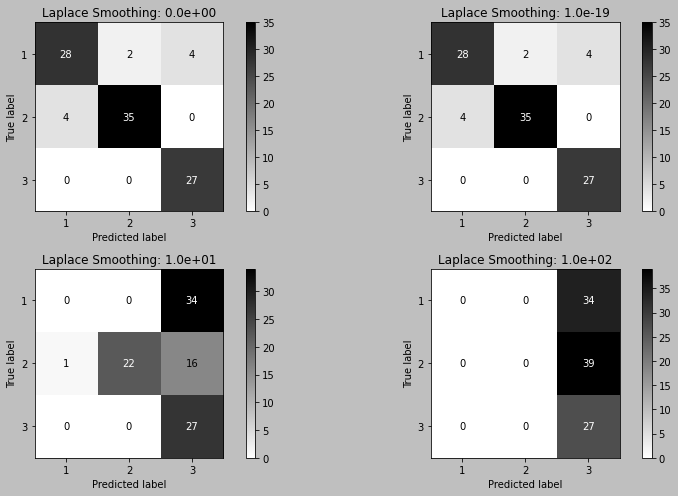

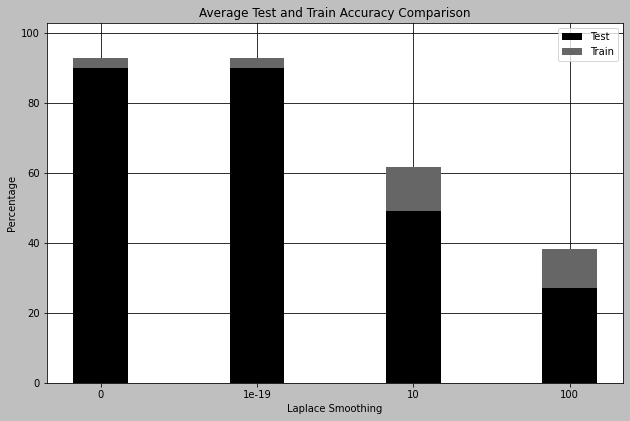

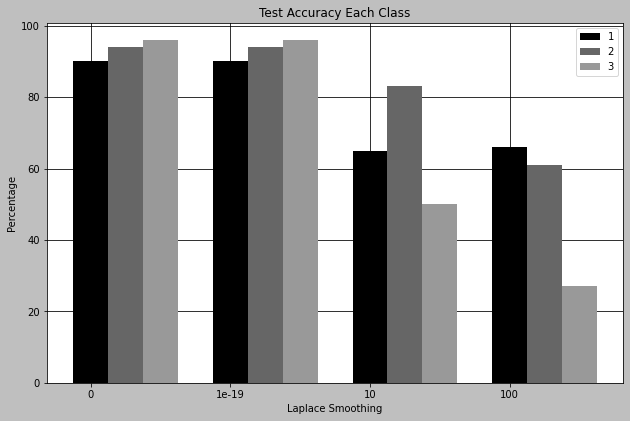

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=CMFigSize)

ltAcc = []; listTrainAcc = []; listTestAcc = []
for smt, ax in zip(smoothing, axes.flatten()):

    gnb, yPred = TrainTest(xTrain, yTrain, xTest, smt) 
    title = 'Laplace Smoothing: %.1e' % smt
    PlotConfusionMatrix(title, gnb, ax, xTest, yTest)
    
    testAcc = GetMeanAcc(yPred, yTest)
    trainAcc = gnb.score(xTrain, yTrain)*100
    
    if (testAcc > bestAcc):
        bestAcc = testAcc
        bestGNB = gnb
    
    listTestAcc.append(testAcc)
    listTrainAcc.append(trainAcc)
    
    typeAcc = GetTypeAcc(yPred, yTest)
    ltAcc.append(typeAcc)
    
plt.tight_layout()
PlotTrainTestAcc(listTrainAcc, listTestAcc, smoothing)
PlotAcc(ltAcc, smoothing)
plt.show()

### Training - Cross Validation
Mengubah parameter untuk pengujian. Data yang sebelumnya dipakai training, sekarang digunakan sebagai testing, begitu juga sebaliknya untuk data yang sebelumnya dipakai untuk testing.

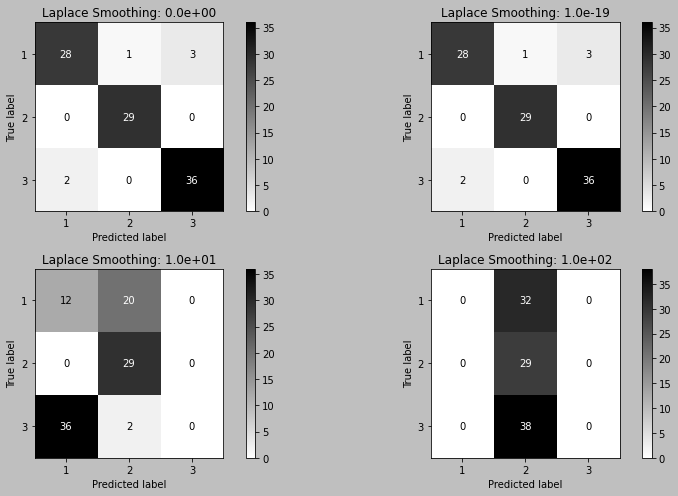

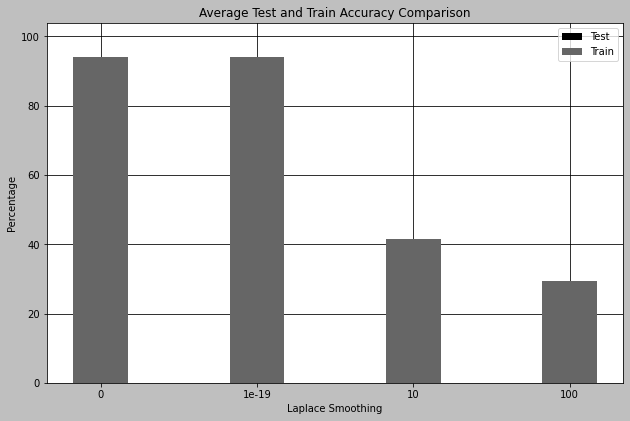

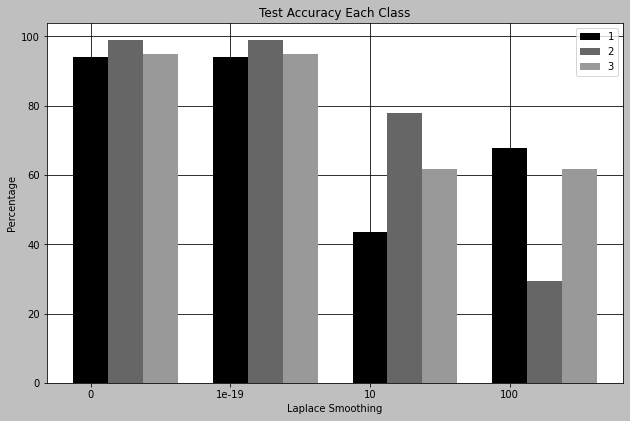

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=CMFigSize)

ltAcc = []; listTrainAcc = []; listTestAcc = []
for smt, ax in zip(smoothing, axes.flatten()):
    
    gnb, yPred = TrainTest(xTest, yTest, xTrain, smt)
    title = 'Laplace Smoothing: %.1e' % smt
    PlotConfusionMatrix(title, gnb, ax, xTrain, yTrain)
    
    testAcc = GetMeanAcc(yPred, yTest)
    trainAcc = gnb.score(xTrain, yTrain)*100
    
    if (testAcc > bestAcc):
        bestAcc = testAcc
        bestGNB = gnb
    
    listTestAcc.append(testAcc)
    listTrainAcc.append(trainAcc)
    
    typeAcc = GetTypeAcc(yPred, yTrain)
    ltAcc.append(typeAcc)
    
plt.tight_layout()
PlotTrainTestAcc(listTrainAcc, listTestAcc, smoothing)
PlotAcc(ltAcc, smoothing)
plt.show()

### Output
Disini saya menggunakan model yang telah dilatih pada proses training sebelumnya (termasuk cross-validation). Model diambil berdasarkan akurasi terbaik. Kemudian saya melakukan prediksi terhadap seluruh data input dan menempatkan hasil prediksi klasifikasi pada kolom 'Type' (sesuai dengan nama kolom aslinya). Tulis ke penyimpanan dengan format csv (ini dapat diproses oleh excel).

In [15]:
df = pd.DataFrame(x, columns=col)
df['Type'] = bestGNB.predict(x)
print(df)
df.to_csv('NaiveBayes-Out.csv')

      Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
194  12.19      13.20       0.8783          5.137         2.981   
195  11.23      12.88       0.8511          5.140         2.795   
196  13.20      13.66       0.8883          5.236         3.232   
197  11.84      13.21       0.8521          5.175         2.836   
198  12.30      13.34       0.8684          5.243         2.974   

     Asymmetry.Coeff  Kernel.Groove  Type  
0              2.221          5.220     1  
1              1.018          4.956     1  
2              2.699          4.825     1  
3              2.25